In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [7]:
df = pd.read_csv('../houseprices.csv')
df.shape

(96, 17)

In [8]:
df.head()

,OrganisationLabel,OrganisationURI,PublishedDate,LatestData,DurationFrom,DurationTo,ReportingPeriodType,Month,GeoEntityName,GeoCode,GeoName,GeoURI,AveragePrice,AveragePriceDetached,AveragePriceSemiDetached,AveragePriceTerraced,AveragePriceFlatOrMaisonette
0,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-08-22T00:00:00,True,2018-06-01T00:00:00,2018-06-30T23:59:59,Month,2018-06,District Council,E07000136,Boston,http://statistics.data.gov.uk/doc/statistical-...,153458,210267,131631,105835,82069
1,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-08-22T00:00:00,True,2018-06-01T00:00:00,2018-06-30T23:59:59,Month,2018-06,District Council,E07000137,East Lindsey,http://statistics.data.gov.uk/doc/statistical-...,169255,208535,144062,114716,86208
2,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-08-22T00:00:00,True,2018-06-01T00:00:00,2018-06-30T23:59:59,Month,2018-06,District Council,E07000138,Lincoln,http://statistics.data.gov.uk/doc/statistical-...,147578,235597,159052,122782,100896
3,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-08-22T00:00:00,True,2018-06-01T00:00:00,2018-06-30T23:59:59,Month,2018-06,District Council,E07000139,North Kesteven,http://statistics.data.gov.uk/doc/statistical-...,205763,249046,169806,141247,101705
4,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2018-08-22T00:00:00,True,2018-06-01T00:00:00,2018-06-30T23:59:59,Month,2018-06,District Council,E07000140,South Holland,http://statistics.data.gov.uk/doc/statistical-...,185205,228877,157058,128691,86009


In [10]:
df.describe()

,AveragePrice,AveragePriceDetached,AveragePriceSemiDetached,AveragePriceTerraced,AveragePriceFlatOrMaisonette
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,174695.531250,232415.989583,153918.614583,124320.781250,94400.239583
std,20657.431458,26043.738795,17109.067049,14282.285741,9058.920326
min,142606.000000,197723.000000,122934.000000,98900.000000,77133.000000
25%,160337.750000,213405.500000,142469.750000,114507.750000,86614.750000
50%,173248.000000,229160.000000,154733.000000,124887.500000,96237.000000
75%,189221.500000,237361.750000,160223.500000,130628.750000,100383.000000
max,213382.000000,300043.000000,192724.000000,155729.000000,110953.000000


In [16]:
dfToConsider = df.iloc[:,13:17]
dfToConsider.shape

(96, 4)

In [19]:
[m, n] = dfToConsider.shape
dfToConsider.head()

,AveragePriceDetached,AveragePriceSemiDetached,AveragePriceTerraced,AveragePriceFlatOrMaisonette
0,210267,131631,105835,82069
1,208535,144062,114716,86208
2,235597,159052,122782,100896
3,249046,169806,141247,101705
4,228877,157058,128691,86009


In [26]:
train = dfToConsider.iloc[:(m-16), :]
test = dfToConsider.iloc[(m-15):, :]

In [29]:
train.shape

(80, 4)

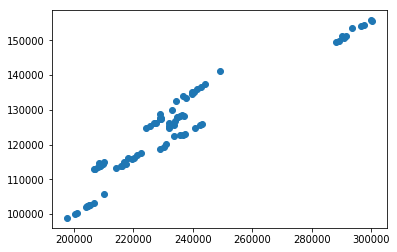

In [37]:
X = train['AveragePriceDetached']
y = train['AveragePriceTerraced']
# y = mx + b (slope formula) ~ theta1.x + theta0
theta = [0, 0] # inital slope and y-itercept for hypothesis
plt.scatter(X, y)

In [33]:
class CostClass(object):
    def __init__(self, cost, theta0, theta1):
        self.cost = cost
        self.theta0 = theta0
        self.theta1 = theta1

In [34]:
def computeCost(m, theta, x, y):
    hypothesis = theta[0] - np.dot(x, theta[1])
    loss = hypothesis - y
    cost = np.sum(loss ** 2) / (2 * m)
    return cost

In [46]:
costThetaList = []

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, learning_rate, num_iterations):
    m = len(x)
    theta0Gradient = 0; # initial value
    theta1Gradient = 0; # initial value
    [theta0, theta1] = theta
    for i in range(0, num_iterations):
        cost = computeCost(m, theta, x, y)
        costThetaList.append(CostClass(cost, theta0, theta1)) # adding history data in set for fetching the minimum later
        
        # Appending value in lists for plotting the graph later-on
#         gradientList.append(cost)
#         theta0List.append(theta0)
#         theta1List.append(theta1)
        
        print("Iteration %d | Cost: %f | theta %f %f" % (i, cost,theta0, theta1))
        theta0Gradient += -(2/m) * (y[i] - ((theta1 * x[i]) + theta0))
        theta1Gradient += -(2/m) * x[i] * (y[i] - ((theta1 * x[i]) + theta1))
        theta0 = theta0 - (learning_rate * theta0Gradient)
        theta1 = theta1 - (learning_rate * theta1Gradient)
        theta = [theta0, theta1]
    return [theta0, theta1]

In [43]:
print("Starting gradient descent at b = %d, m = %d, error = %f" % (theta[0], theta[1], computeCost(m, theta, X, y)))

Starting gradient descent at b = 0, m = 0, error = 6545065293.286458


In [48]:
# Set hyper paramters
learning_rate = 0.1
num_iterations = 10000

In [49]:
print("Running...")
theta = gradientDescent(X, y, theta, learning_rate, num_iterations)

# Sort the data in ascending wrt mean square error
# costThetaList.sort(key=lambda x: x.cost, reverse=False)
# print("After %d iterations b = %f, m = %f, error = %f" % (num_iterations, costThetaList[0].theta0, costThetaList[0].theta1, costThetaList[0].cost))

Running...
Iteration 0 | Cost: 7854078351.943750 | theta 0.000000 0.000000
Iteration 1 | Cost: 85041617386440191199150080.000000 | theta 264.587500 55634019.862500
Iteration 2 | Cost: 1005151410270558436014643536753491873628160.000000 | theta -29004100014.762566 -6048398999624871.000000
Iteration 3 | Cost: 19355045738903094048845459693706878262132978642351489548288.000000 | theta 3562461589850861568.000000 839308827198417960697856.000000
Iteration 4 | Cost: 465367423784933137523552243644031149307330678122179846678189374545556668416.000000 | theta -522566258330125947325382656.000000 -130143559031947947493807999680512.000000
Iteration 5 | Cost: 7981571111546616295619006915841915587627757685802818967037854400000368400092575977502146560.000000 | theta 74467167357561786972631798072213504.000000 17043896309085737678577178782529096777728.000000
Iteration 6 | Cost: 370096513402486941802790547310832882048885883085261674871201976315167347189293389394106340631079559062618112.000000 | theta -12505

/home/mukul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
/home/mukul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


KeyError: 80